# Control: Proxima Centauri

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../')
from hipparchus import EchelleSpectrum, Template, cross_corr

Import the echelle spectrum from the `e2ds` file: 

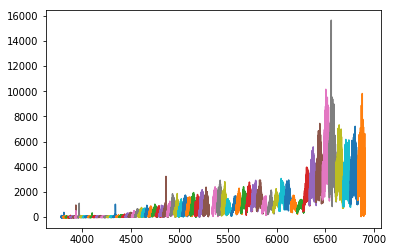

In [2]:
spectrum = EchelleSpectrum.from_e2ds('/Users/bmmorris/data/harps/proxima/HARPS.2004-05-27T02:10:14.820_e2ds_A.fits')

spectrum.plot()

Continuum normalize each echelle order: 

/Users/bmmorris/anaconda/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


(0, 1.5)

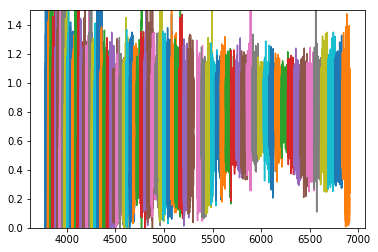

In [3]:
spectrum.continuum_normalize()

spectrum.plot()
plt.ylim([0, 1.5])

Load a template for TiO at 4000 K, generated by Daniel Kitzmann: 

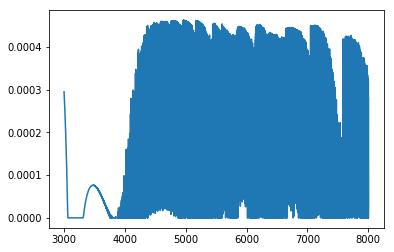

In [20]:
template_tio_3000 = Template.from_npy('../kitzmann/emission_spectrum_3000K_tio.npy')
template_tio_4000 = Template.from_npy('../kitzmann/emission_spectrum_4000K_tio.npy')

template_tio_3000.plot()

Cross-correlate the spectrum against the template: 

S/N: 20.42743349198955;
RV = [-19.32922029] km / s


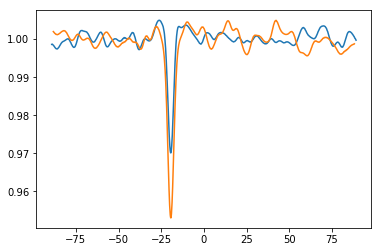

In [22]:
wavelength_0 = 6725
wavelength_1 = 6800

ccf_0 = cross_corr(spectrum.nearest_order(wavelength_0), template_tio_3000)
ccf_1 = cross_corr(spectrum.nearest_order(wavelength_1), template_tio_3000)

ccf_0.plot()
ccf_1.plot()

print('S/N: {0};\nRV = {1}'.format(ccf_1.signal_to_noise, ccf_1.rv))

Find which spectral orders contain the strongest TiO signal at each temperature: 

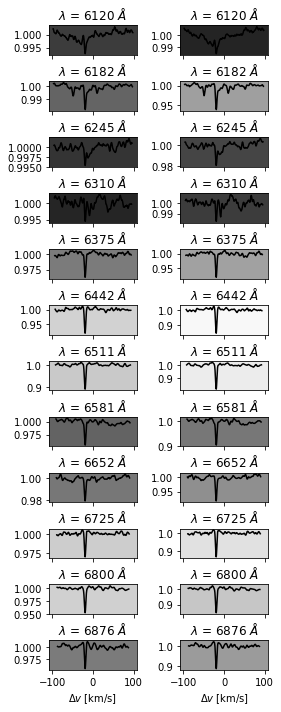

In [51]:
wavelength_0 = 6725
wavelength_1 = 6800

n_orders = 12

fig, ax = plt.subplots(n_orders, 2, figsize=(4, 10), sharex=True)

templates = [template_tio_3000, template_tio_4000]

for i, template in enumerate(templates): 
    counter = -1
    for order in spectrum.orders: 
        if order.wavelength.mean() > 6100: 
            counter += 1 
            ccf = cross_corr(order, template)
            sn = ccf.signal_to_noise

            ccf.plot(color='k', ax=ax[counter, i], label='{0:.0f} $\AA$'.format(order.wavelength.mean()))
            ax[counter, i].set_facecolor((0, 0, 0, max([1 - sn/25, 0])))
            ax[counter, i].set_title("$\lambda$ = {0:.0f} $\AA$".format(order.wavelength.mean()))
            
ax[-1, 0].set_xlabel('$\Delta v$ [km/s]')
ax[-1, 1].set_xlabel('$\Delta v$ [km/s]')
fig.tight_layout(h_pad=0.1)
fig.savefig('plots/control.pdf', bbox_inches='tight')

***

# Searching for spots on Proxima Centauri

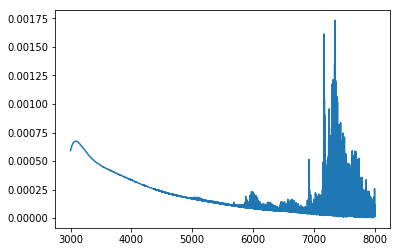

In [39]:
template_h2o_2500 = Template.from_npy('../kitzmann/emission_spectrum_3000K_h2o.npy')

template_h2o_2500.plot()

There's only an appreciable absorption signal $>5800$ Angstroms

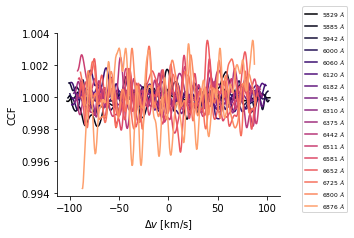

In [50]:
plt.figure(figsize=(4, 3))
counter = -1
for order in spectrum.orders: 
    if order.wavelength.mean() > 5800:
        counter += 1
        ccf = cross_corr(order, template_h2o_2500)
        ccf.plot(label='{0:.0f} $\AA$'.format(order.wavelength.mean()), color=plt.cm.magma(counter/20))
plt.legend(loc=(1.1, -0.1), fontsize=6)
plt.xlabel('$\Delta v$ [km/s]')
plt.ylabel('CCF')

for s in ['right', 'top']: 
    plt.gca().spines[s].set_visible(False)

plt.savefig('plots/proxcen_h2o.pdf', bbox_inches='tight')

No significant water absorption signal is detected.